**Step 1: Install & Import Libraries**

In [ ]:
# Import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**Step 2: Load the Datase**

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Step 3: Understand Your Data (EDA)**


In [ ]:
# Check basic info
print(df.info())

# Show column names
print(df.columns)

# Check for missing values
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [ ]:
df.shape


(301, 9)

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

**Step 4: Clean and Preprocess the Data**

In [ ]:
df.drop(['Car_Name'], axis=1, inplace=True)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
'''df['fuel'] = df['fuel'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2})
df['seller_type'] = df['seller_type'].map({'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2})
df['transmission'] = df['transmission'].map({'Manual': 0, 'Automatic': 1})'''
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [ ]:
df['Fuel_Type']=df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,2015,4.00,5.90,60000,0,Dealer,Manual,0
298,2009,3.35,11.00,87934,0,Dealer,Manual,0
299,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [ ]:
df['Selling_type'].value_counts()

,count
Selling_type,
Dealer,195
Individual,106


In [ ]:
df['Selling_type']=df['Selling_type'].map({'Individual':0,'Dealer':1,'Trustmark Dealer':2})
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,1,Manual,0
1,2013,4.75,9.54,43000,1,1,Manual,0
2,2017,7.25,9.85,6900,0,1,Manual,0
3,2011,2.85,4.15,5200,0,1,Manual,0
4,2014,4.60,6.87,42450,1,1,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,Manual,0
297,2015,4.00,5.90,60000,0,1,Manual,0
298,2009,3.35,11.00,87934,0,1,Manual,0
299,2017,11.50,12.50,9000,1,1,Manual,0


In [ ]:
df['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [ ]:
df['Transmission']=df['Transmission'].map({'Manual':0,'Automatic':1})
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,1,0,0
1,2013,4.75,9.54,43000,1,1,0,0
2,2017,7.25,9.85,6900,0,1,0,0
3,2011,2.85,4.15,5200,0,1,0,0
4,2014,4.60,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,1,0,0
297,2015,4.00,5.90,60000,0,1,0,0
298,2009,3.35,11.00,87934,0,1,0,0
299,2017,11.50,12.50,9000,1,1,0,0


**Step 5: Split Data into Train and Test Sets**

In [ ]:
# Define features and label
X = df.drop('Selling_Price', axis=1)  # all except price
y = df['Selling_Price']  # price

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 6: Train a Regression Model**

In [ ]:
# Use Linear Regression (you can later try Random Forest or others)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_pred[:7]

array([ 2.96562958,  8.30085782,  6.05782751, -1.46736816,  9.25705687,
        7.03171029,  1.35032876])

**Step 7: Evaluate the Model**

In [ ]:
# Check model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 3.5315798889713776
R-squared Score: 0.8466902419662637


**Step 8: Visualize Results**

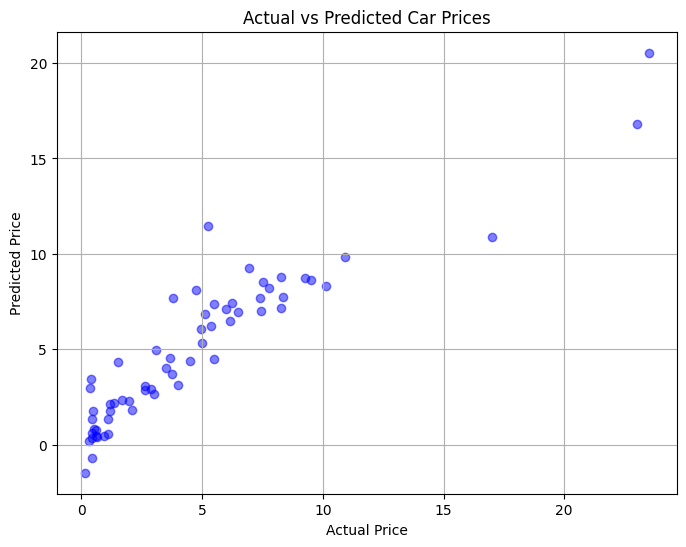

In [ ]:
# Actual vs Predicted Price
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()